# Softmax1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
def my_sorfmax(z):
    ez = np.exp(z)
    sm = ez/np.sum(ez)
    print(f"sm.shape: {sm.shape}")
    return sm

In [3]:
plt.close('all')

sm.shape: (4,)


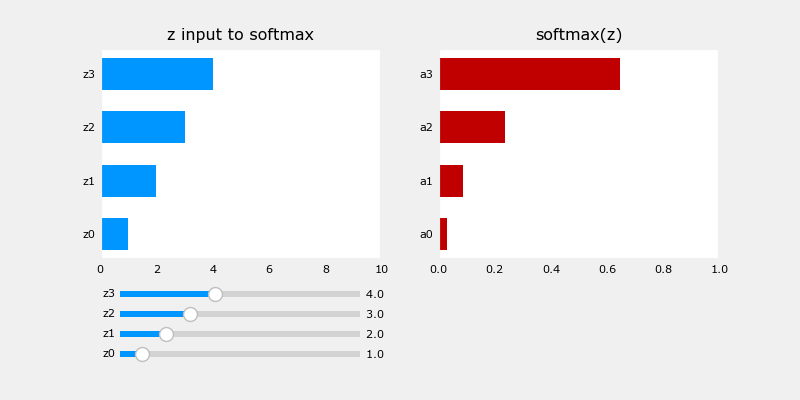

In [4]:
plt_softmax(my_sorfmax)

In [5]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0, random_state=30)

In [6]:
model = Sequential([
    Dense(25, activation='relu'),
    Dense(15, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01)
)

In [7]:
model.fit(
    X_train, y_train,epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.2180 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0392
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.0259
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.0188
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.0194
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.0177
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.0174
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.0188  
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.0180
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.0331


In [8]:
p_nonpreferd = model.predict(X_train)
print(p_nonpreferd[:2])
print("largest value", np.max(p_nonpreferd), "smallest value", np.min(p_nonpreferd))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step
[[8.38e-07 1.66e-04 1.00e+00 3.52e-05]
 [1.00e+00 3.38e-04 1.56e-06 1.04e-08]]
largest value 1.0 smallest value 2.5293627e-22


In [9]:
preferred_model=Sequential([
    Dense(25, activation='relu'),
    Dense(15, activation='relu'),
    Dense(4, activation='linear')
])

In [10]:
preferred_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01)
)

In [11]:
preferred_model.fit(
    X_train, y_train,epochs=10
)

Epoch 1/10


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 0.2131 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.0408
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.0237
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.0207
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.0203
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.0278
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.0192
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.0165  
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.0156
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.0230


In [12]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
two example output vectors:
 [[ -5.22  -1.02   6.51  -1.27]
 [ 14.42   1.31 -10.76  -3.7 ]]
largest value 35.96476 smallest value -16.15781


In [13]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()

In [14]:
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[8.06e-06 5.35e-04 9.99e-01 4.21e-04]
 [1.00e+00 2.03e-06 1.16e-11 1.36e-08]]
largest value 1.0 smallest value 6.4069573e-21


In [15]:
for i in range(5):
    print(f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-5.22 -1.02  6.51 -1.27], category: 2
[ 14.42   1.31 -10.76  -3.7 ], category: 0
[10.57  2.43 -8.03 -3.59], category: 0
[-6.04  7.68  1.04 -4.39], category: 1
[-1.43 -2.47  4.95 -3.49], category: 2


## softnax数值太大处理方案

In [16]:
for z in [500, 600, 700, 800]:
    ez = np.exp(z)
    zs = "{" + f"{z}" + "}"
    print(f"e^{zs} = {ez:0.2e}")

e^{500} = 1.40e+217
e^{600} = 3.77e+260
e^{700} = 1.01e+304
e^{800} = inf


/var/folders/gz/0gxv2qld2094b0b1mp3z79tc0000gn/T/ipykernel_26688/1479158070.py:2: RuntimeWarning: overflow encountered in exp
  ez = np.exp(z)


In [17]:
z_tmp = np.array([500, 600, 700, 800])
my_sorfmax(z_tmp)

sm.shape: (4,)


/var/folders/gz/0gxv2qld2094b0b1mp3z79tc0000gn/T/ipykernel_26688/3503646383.py:2: RuntimeWarning: overflow encountered in exp
  ez = np.exp(z)
/var/folders/gz/0gxv2qld2094b0b1mp3z79tc0000gn/T/ipykernel_26688/3503646383.py:3: RuntimeWarning: invalid value encountered in divide
  sm = ez/np.sum(ez)


array([ 0.,  0.,  0., nan])

In [18]:
def my_sorfmax_zs(z):
    bigz = np.max(z)
    ez=np.exp(z-bigz)
    sm =ez/np.sum(ez)
    return(sm)

In [19]:
z_tmp = np.array([500.,600,700,800])
print(tf.nn.softmax(z_tmp).numpy())

[5.15e-131 1.38e-087 3.72e-044 1.00e+000]


In [20]:
my_sorfmax_zs(z_tmp)

array([5.15e-131, 1.38e-087, 3.72e-044, 1.00e+000])